In [63]:
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
with MPRester("OrxTdTdienuaKM79RmZ") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-1008680")
    bandes = m.get_bandstructure_by_material_id("mp-1008680")
    

Données sur la bande interdite : 

In [64]:
#On cherche la bande correspondante
import pymatgen.electronic_structure
from pymatgen.electronic_structure.plotter import BSPlotter

bandesbis = bandes.get_band_gap()
print("L'énergie de la bande interdite vaut : ", bandesbis["energy"])
print("Bande directe ? : ", bandesbis["direct"])
print("Etiquettes des points k de la transition : ", bandesbis["transition"])


L'énergie de la bande interdite vaut :  0.8809000000000005
Bande directe ? :  False
Etiquettes des points k de la transition :  \Gamma-X


On recherche les valeurs uniques des distances

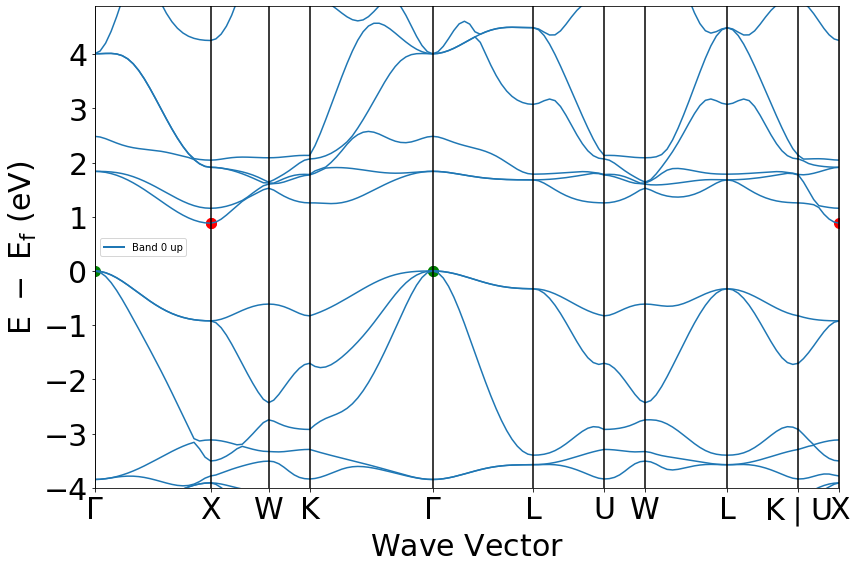

In [59]:
#On obtient le graphique : 
graph = BSPlotter(bandes)
graph.get_plot(vbm_cbm_marker = True)
data = graph.bs_plot_data()
dist = data.get("ticks").get("distance")

#on constate qu'il y a des valeurs identiques dans dist, on crée alors un array similaire en conservant les valeurs uniques
import numpy as np
newdist = [dist[0], dist[1], dist[3], dist[5], dist[7],dist[9],dist[11], dist[13], dist[15],dist[17], dist[18]]

d0 = newdist[1]-newdist[0]
d1 = newdist[2]-newdist[1]
d2 = newdist[3]-newdist[2]
d3 = newdist[4]-newdist[3]
d4 = newdist[5]-newdist[4]
d5 = newdist[6]-newdist[5]
d6 = newdist[7]-newdist[6]
d7 = newdist[8]-newdist[7]
d8 = newdist[9]-newdist[8]
d9 = newdist[10]-newdist[9]

d = [d0,d1,d2,d3,d4,d5,d6,d7,d8,d9]


Recherche des différentes pentes à partir du rapport des énergies sur les distances : 


In [60]:
energie = data.get('energy')

# Valence Band Maximums (VBM)
VBM = bandes.get_vbm()

# Conduction Band Minimums (CBM) 
CBM = bandes.get_cbm()

print("Index vbm :" , VBM['band_index'])
print("Index cbm :" , CBM['band_index'])

energc = np.zeros(9)
energv = np.zeros(9)
pentec = np.zeros(9)
pentev = np.zeros(9)

for i in range(9):
    energv[i] =energie.get('1')[i][16][-1] - energie.get('1')[i][16][0]
    energc[i] =energie.get('1')[i][17][-1] - energie.get('1')[i][17][0]

    
for i in range (9):
    pentec[i] = energc[i]/d[i]
    pentev[i] = energv[i]/d[i] 


#on calcule les minimums et les maximums pour les bandes de valence et conduction
maxV = np.max(abs(pentev)) #d0
maxC = np.max(abs(pentec)) #d1
minC = np.min(abs(pentec)) #d4
minV = np.min(abs(pentev)) #d4


Index vbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15, 16]})
Index cbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [17]})


On insère nos flèches dans notre graphe

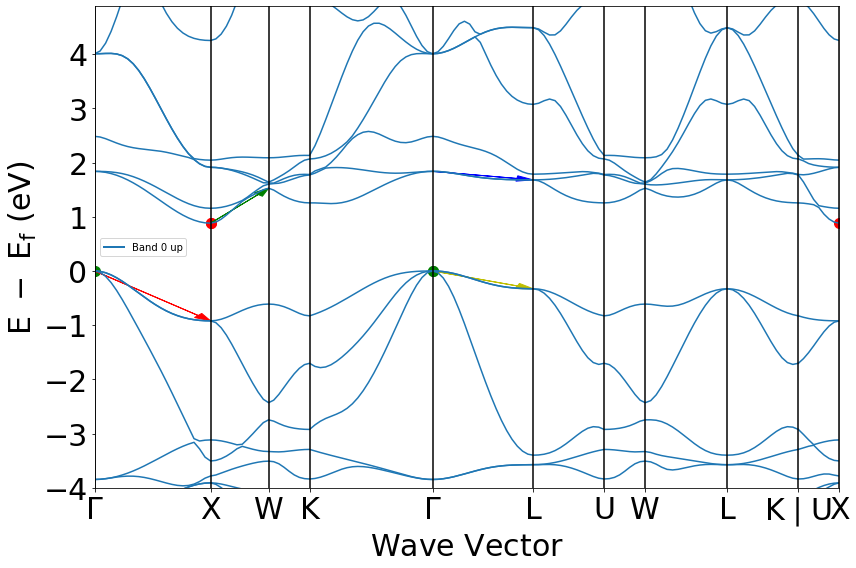

In [62]:

graph.get_plot(vbm_cbm_marker = True)
#pour le plot 
import matplotlib.pyplot as plt

plt.arrow(newdist[0], (energie.get('1')[0][16])[0], d[0], energv[0], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(newdist[1], (energie.get('1')[1][17])[0], d[1], energc[1], color = 'g', head_width = 0.1,length_includes_head=True)
plt.arrow(newdist[4], (energie.get('1')[4][17])[0], d[4], energc[4], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(newdist[4], (energie.get('1')[4][16])[0], d[4], energv[4], color = 'y', head_width = 0.1,length_includes_head=True)